In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
import pickle
%matplotlib inline

# Data Preprocessing



In [2]:
data = pd.read_csv('IMDB_25k.csv')

In [3]:
data.drop('Unnamed: 0', axis = 1, inplace= True)

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# data = data[:5000]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
movies_reviews = data['review']

# Cleaning Function
### making a fucntion to cremove punctuations from the dataset

In [8]:
def clean_text(text):
    text_no_punc=''.join([char for char in text if char not in string.punctuation])
    return [word for word in text_no_punc.split() if word.lower() not in stopwords.words('english')]

In [9]:
movies_reviews = movies_reviews.apply(clean_text)

# Data Visualization

In [66]:
txt=''
for val in movies_reviews[:]:
    txt+=(' '.join(val))+' '

In [67]:
wordcloud= WordCloud(width=800,height=800,
                    background_color='white',stopwords=set(STOPWORDS),
                    min_font_size=10).generate(txt)

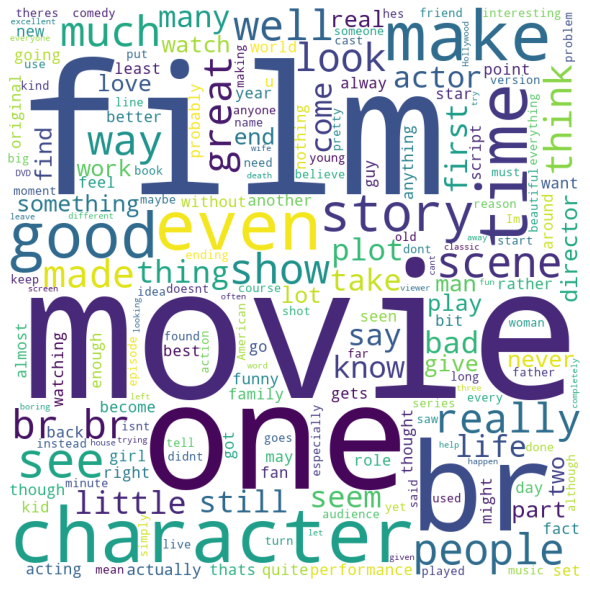

In [12]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Creating Pipeline

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [11]:
X_train, X_test, y_train, y_test =train_test_split(data['review'],data['sentiment'],test_size=0.3,random_state=101)

In [12]:
rf_pipeline=Pipeline([
                ('BoW',CountVectorizer(analyzer=clean_text)),
                ('tfidf',TfidfTransformer()),
                ('RF_Classifier',RandomForestClassifier(n_estimators=1000))    
                     ])

lr_pipeline=Pipeline([
                ('BoW',CountVectorizer(analyzer=clean_text)),
                ('tfidf',TfidfTransformer()),
                ('lr_Classifier',LogisticRegression())    
                     ])

# Logistic Regression

In [13]:
lr_pipeline.fit(X_train,y_train)
set_config(display='diagram')   
lr_pipeline

Pipeline(steps=[('BoW',
                 CountVectorizer(analyzer=<function clean_text at 0x7fab0b832430>)),
                ('tfidf', TfidfTransformer()),
                ('lr_Classifier', LogisticRegression())])

In [14]:
lr_predict = lr_pipeline.predict(X_test)

In [22]:
filename = 'lr_pipeline10k.sav'
pickle.dump(lr_pipeline, open(filename, 'wb'))

In [132]:
lr_model = pickle.load(open('lr_pipeline.sav', 'rb'))
lr_predict = lr_model.predict(X_test)

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      3740
    positive       0.88      0.89      0.88      3760

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

..................................................................... 

confusion matrix is 
  [[3261  479]
 [ 400 3360]]


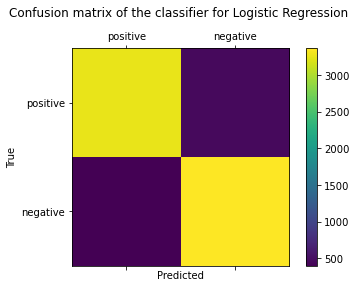

In [15]:
print(classification_report(y_test, lr_predict))
labels = ['positive', 'negative']
cm_lr = confusion_matrix(y_test, lr_predict)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_lr)
print('..................................................................... \n')
print('confusion matrix is \n ', cm_lr)
plt.title('Confusion matrix of the classifier for Logistic Regression \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
print(confusion_matrix(y_test, lr_predict))

[[628 135]
 [ 88 649]]


# Random Forest

In [16]:
rf_pipeline.fit(X_train,y_train)
set_config(display='diagram')   
rf_pipeline

Pipeline(steps=[('BoW',
                 CountVectorizer(analyzer=<function clean_text at 0x7fab0b832430>)),
                ('tfidf', TfidfTransformer()),
                ('RF_Classifier', RandomForestClassifier(n_estimators=1000))])

In [17]:
rf_predict = rf_pipeline.predict(X_test)

In [27]:
filename = 'rf_pipeline.sav'
pickle.dump(rf_pipeline, open(filename, 'wb'))

In [110]:
rf_model = pickle.load(open('rf_pipeline.sav', 'rb'))
rf_predict = rf_model.predict(X_test)

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      3740
    positive       0.87      0.86      0.87      3760

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

..................................................................... 

confusion matrix is 
  [[3274  466]
 [ 534 3226]]


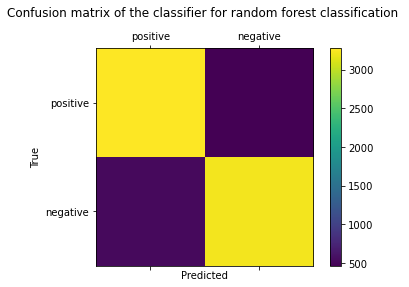

In [18]:
print(classification_report(y_test, rf_predict))
#Plot confusion matrix

labels = ['positive', 'negative']
cm_rf = confusion_matrix(y_test, rf_predict)
print('..................................................................... \n')
print('confusion matrix is \n ', cm_rf)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_rf)
plt.title('Confusion matrix of the classifier for random forest classification \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparing the 2 algorithm

In [19]:
lr_accuracy = (cm_lr[0][0] + cm_lr[1][1])/np.sum(cm_lr) 
lr_misclassification = (cm_lr[0][1] + cm_lr[1][0])/np.sum(cm_lr) 
lr_precision = (cm_lr[0][0])/(cm_lr[0][0] + cm_lr[0][1])
lr_senstivity = cm_lr[0][0]/(cm_lr[0][0]+cm_lr[1][0])
lr_specificity = cm_lr[1][1]/(cm_lr[1][1]+cm_lr[0][1])

rf_accuracy = (cm_rf[0][0] + cm_rf[1][1])/np.sum(cm_rf) 
rf_misclassification = (cm_rf[0][1] + cm_rf[1][0])/np.sum(cm_rf) 
rf_precision = (cm_rf[0][0])/(cm_rf[0][0] + cm_rf[0][1])
rf_senstivity = cm_rf[0][0]/(cm_rf[0][0]+cm_rf[1][0])
rf_specificity = cm_rf[1][1]/(cm_rf[1][1]+cm_rf[0][1])

In [20]:
df = pd.DataFrame()
df['value'] = pd.Series([lr_accuracy, rf_accuracy,lr_misclassification, rf_misclassification, lr_precision,
                        rf_precision, lr_senstivity, rf_senstivity, lr_specificity, rf_specificity])
df['Algorithm'] = pd.Series(['LR', "RF", 'LR', "RF", 'LR', "RF", 'LR', "RF", 'LR', "RF"])
df['group'] = pd.Series(['accuracy', 'accuracy', 'misclassification', 'misclassification', 'precesion',
                         'precesion', 'senstivity', 'senstivity' ,'specificity', 'specificity'  ])

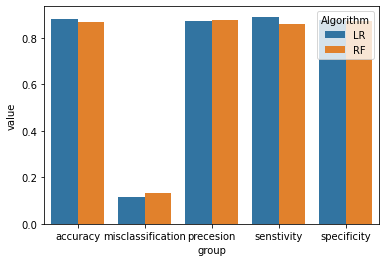

In [21]:
sns.barplot(x='group', y = 'value', data = df, hue = 'Algorithm')